In [22]:
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

In [15]:
tks = yf.Tickers(['AAPL', 'GOOG'])
tks

yfinance.Tickers object <AAPL,GOOG>

In [16]:
tkPrice = tks.history(period='1y')

[*********************100%***********************]  2 of 2 completed


In [43]:
Y = tkPrice.Close.GOOG

In [47]:
x1 = np.arange(len(Y))
X = sm.add_constant(x1)

In [48]:
lm = sm.OLS(Y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GOOG   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     2972.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          3.95e-141
Time:                        19:47:01   Log-Likelihood:                -1529.9
No. Observations:                 253   AIC:                             3064.
Df Residuals:                     251   BIC:                             3071.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1904.7060     12.880    147.883      0.000    1879.340    1930.072
x1             4.8211      0.088     54.513      0.000       4.647       4.995
==============================================================================
Omnibus:                       15.367   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.067
Skew:                          -0.245   Prob(JB):                       0.0177
Kurtosis:                       2.276   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

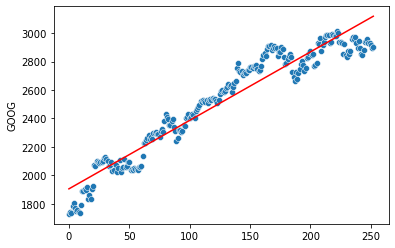

In [52]:
import seaborn as sns
import matplotlib.pyplot as pl

# plotting the data points
sns.scatterplot(x= x1, y=Y)


# SPY coef: 1.1188
# Constant coef: -119.4727
# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏

slope= lm.params['x1']
bias=  lm.params['const']

y_pred= slope * x1 + bias

#plotting the line
sns.lineplot(x=x1, y= y_pred, color='red')

#axes
#pl.xlim(0)
#pl.ylim(0)
pl.show()